# Financial Econometrics and Regression

One of the most major tools in financial econometrics is regression, in both univariate and multivariate forms.

What is the difference between traditional mathematics and statistical learning?

First is the standard mathematical way. Assume a mathematical function is given as follows:

$$f:\mathbb{R}→\mathbb{R}_+, x↦2+\frac{1}{2}x$$

Given multiple values of $x_i, i=1,2,..., n$, we can derive the functions values for $f$ by applying the above definition:

$$ y_i=f(x_i), i=1,2,...,n$$



In [11]:
import numpy as np

def f(x):
    return 2 + 1 / 2 * x

In [12]:
x = np.arange(-4, 5)
x

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [13]:
y = f(x)
y

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

Second is the approach taken in statistical learning. The data is generally given and a functional relationshipis to be found.

Consider the following data:

$$(x_i, y_i), i=1,2,...,n$$

The problem is to find, for example, parameters $\alpha, β$:

$$\hat{f}(x_i)\equiv\alpha+\beta x_i=\hat{y_i}\approx y_i, i=1,2,...,n$$

$α, β$ are chosen to minimize the mean-sqaured error between the approximated values $\hat{y_i}$ and the real values $y_i$.

$$\min_{α, β}\frac{1}{n}\sum_{i}^n(\hat{y_i}-y_i)^2$$


In the case of simple OLS regression, the optimal solutions are known as follows:

$$
\begin{cases}β=\frac{Cov(x, y}{Var(x)}
\\ α = \bar{y}-\beta{\bar{x}}
\end{cases}
$$

In [14]:
beta = np.cov(x, y, ddof=0)[0, 1] / x.var()
beta

0.49999999999999994

In [15]:
alpha = y.mean() - beta * x.mean()
alpha

2.0

In [16]:
# estimated values

y_ = alpha + beta * x

In [17]:
# check whether values are numerically equal

np.allclose(y_, y)

True

# Data Availability

### Structured Historical Data


In [18]:
# !pip install eikon

In [19]:
# using Eikon Data API
# import eikon as ek
import configparser

## Alternative Data

- Web-scraped data
- Crowd-sourced data
- Credit cards and point-of-sales(POS) systems
- Social media sentiment
- Search trends
- Web traffic
- Supply chain data
- Energy production data
- Consumer profiles
- Satellite imagery/geospacial data
- App installs
- Ocean vessel tracking
- Wearables, drones, Internet of Things (IoT) sensors

### Apple Inc. press

Apple Inc. press releases in the form of HTML pages.


In [20]:
# !pip install nlp

In [4]:
# import the NLP helper functions
%load_ext autoreload
%autoreload 2

import nlp
import requests

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/woojin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
sources = [
    'https://nr.apple.com/dE0b1T5G3u',    # iPad Pro,
    'https://nr.apple.com/dE4c7T6g1K',    # MacBook Air
    'https://nr.apple.com/dE4q4r8A2A'     # Mac Mini
]

In [6]:
# retrieves the raw HTML codes for the three press release
html = [requests.get(url).text for url in sources]

In [7]:
html

['<!DOCTYPE html>\n\n\n\n\n\t<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en-US" lang="en-US" dir="ltr" prefix="og: http://ogp.me/ns#" class="no-js globalheader-dark">\n\n\n\n\n<head>\n\t\n\t\n\t\n\t\n\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<meta charset="utf-8" />\n\n\t\n    \t <link rel="canonical" href="https://www.apple.com/newsroom/2018/10/new-ipad-pro-with-all-screen-design-is-most-advanced-powerful-ipad-ever/"/>\n    \t \n    \t \n\t\n<meta name="viewport" content="width=device-width, initial-scale=1, viewport-fit=cover" />\n\n\t\n\t\n\t\t<link rel="stylesheet" type="text/css" href="https://www.apple.com/api-www/global-elements/global-header/v1/assets/globalheader.css" />\n\t\n\t<link rel="stylesheet" type="text/css" href="/ac/localnav/4/styles/ac-localnav.built.css" />\n\t<link rel="stylesheet" type="text/css" href="/ac/globalfooter/8/en_US/styles/ac-globalfooter.built.css" />\n\n\n\t\n    \n\n<link rel="alternate" href="https://www.apple.com.cn/

In [15]:
# cleans up the raw HTML codes
data = [nlp.clean_up_text(t) for t in html]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/woojin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
data[0][536:1001]

'to enable desktop notifications when new articles are published press release october 30, 2018 new ipad pro with all-screen designis most advanced, powerful ipad ever 11-inch and 12.9-inch models feature liquid retina display, powerful a12x bionic chip and face id introducing the new ipad pro with all-screen design and next-generation performance. new york apple today introduced the new ipad pro with all-screen design and next-generation performance, marking th'

# Normative Theories Revisited

## Expected Utility and Reality


### St. Pertersburg paradox

St. Petersburg paradox introduced a utility function with positive but decreasing marginal utility:

$$\frac{\partial u}{\partial x} > 0 \\
\frac{\partial^2 u}{\partial x^2} <0
$$

One such a candidate function is $u(x)=\ln(x)$ with $\frac{\partial u}{\partial x}=\frac{1}{2}$, $\frac{\partial^2 u}{\partial x^2}=-\frac{1}{x^2}$.


### Allais paradox and Ellsberg paradox

Human beings as decision makers can in general not be compared to machines that carefully collect data and then crunch the numbers to make a decision under uncertainty.



## Mean-Variance Theory

In [26]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
from scipy.optimize import minimize

In [27]:
# retrieves hitorical EOD data from a remote location
url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'
raw = pd.read_csv(url, index_col=0, parse_dates=True).dropna()
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [28]:
# specifies the symbols to be invested in
symbols = ['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GLD']

In [29]:
# calculate teh log returns for all time series
rets = np.log(raw[symbols] / raw[symbols].shift(1)).dropna()

<Axes: xlabel='Date'>

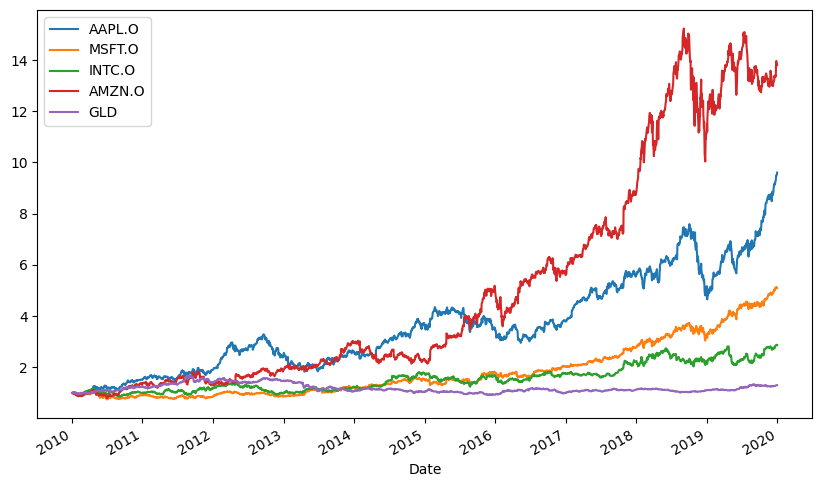

In [30]:
# plot the normalized financial time series for the selecte symbols
(raw[symbols] / raw[symbols].iloc[0]).plot(figsize=(10, 6))

The data-driven investor wants to first set a baseline for performance as given by an equally weighted portfolio.

In [31]:
# equally weighted portfolio
weights = len(rets.columns) * [1 / len(rets.columns)]

In [32]:
# portfolio return
def port_return(rets, weights):
    return np.dot(rets.mean(), weights) * 252

In [33]:
port_return(rets, weights)

0.156947646530181

In [34]:
# portfolio volatility
def port_volatility(rets, weights):
    return np.dot(weights, np.dot(rets.cov() * 252, weights)) ** 0.5

In [35]:
port_volatility(rets, weights)

0.16106507848480678

In [36]:
def port_sharpe(rets, weights):
    return port_return(rets, weights) / port_volatility(rets, weights)

In [37]:
port_sharpe(rets, weights)

0.9744362217225494

In [38]:
# simulates portfolio weights adding up to 100%
w = np.random.random((1000, len(symbols)))
w = (w.T / w.sum(axis=1)).T
w[:5]

array([[0.12607949, 0.30358974, 0.13003599, 0.06246553, 0.37782924],
       [0.1606806 , 0.30304216, 0.02577727, 0.04727017, 0.4632298 ],
       [0.18566177, 0.28189121, 0.04927795, 0.25473655, 0.22843251],
       [0.1797518 , 0.03671074, 0.65423383, 0.04245318, 0.08685046],
       [0.16961511, 0.0687993 , 0.25333089, 0.30926124, 0.19899346]])

In [39]:
# derives the resulting portfolio volatilities and returns
pvr = [(port_volatility(rets[symbols], weights),
        port_return(rets[symbols], weights)) for weights in w]
pvr = np.array(pvr)

# calculate the resulting Sharpe ratio
psr = pvr[:, 1] / pvr[:, 0]

Text(0.5, 1.0, 'AAPL.O | MSFT.O | INTC.O | AMZN.O | GLD')

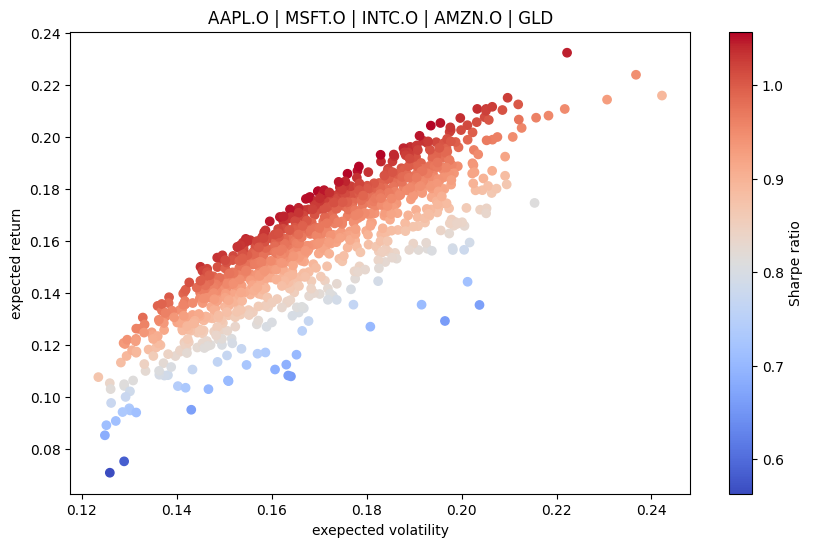

In [40]:
plt.figure(figsize=(10, 6))
fig = plt.scatter(pvr[:, 0], pvr[:, 1], c=psr, cmap='coolwarm')
cb = plt.colorbar(fig)
cb.set_label('Sharpe ratio')
plt.xlabel('exepected volatility')
plt.ylabel('expected return')
plt.title(' | '.join(symbols))

The optimal portfolio composition was derived from the financial time series data available from 2010.

In [41]:
# sepcifies the bound for the single asset weights
bnds = len(symbols) * [(0, 1), ]
bnds

[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

In [42]:
# specifies that all weights need to add up to 100%
cons = {
    'type': 'eq',
    'fun': lambda weights: weights.sum() - 1
}

In [43]:
opt_weights = {}
# selected the relevant data set for the given year
for year in range(2010, 2019):
    rets_ = rets[symbols].loc[f'{year}-01-01':f'{year}-12-31']

    ow = minimize(lambda weights: -port_sharpe(rets_, weights), len(symbols) * [1 / len(symbols)], bounds=bnds)['x']
    opt_weights[year] = ow

opt_weights

{2010: array([0.63263018, 0.        , 0.        , 0.09713663, 1.        ]),
 2011: array([1.        , 0.        , 0.14277248, 0.        , 0.69972266]),
 2012: array([0.67914386, 0.        , 0.        , 0.98819355, 0.43070366]),
 2013: array([0.02479709, 0.6554449 , 0.47168216, 0.99829502, 0.        ]),
 2014: array([1.        , 0.25361166, 0.92639711, 0.        , 0.03248402]),
 2015: array([0., 0., 0., 1., 0.]),
 2016: array([0.21565532, 0.37489417, 0.        , 0.08339574, 0.76789481]),
 2017: array([0.29571429, 0.25986749, 0.03953284, 0.1399529 , 0.54655588]),
 2018: array([0.        , 0.41616789, 0.        , 1.        , 0.        ])}

The optimal porfolio compositions as derived for the relevant years illustrated that MVP theory in its original form quite often leads to (relative) extreme situations in the sense that one or more assets are not included at all. This can be actively avoided by setting a minimum weight for every asset considered.

To complete the backtest, the following code compares the expected porfolio statistics with the realized porfolio statistics for the current year.

In [48]:
res = pd.DataFrame()
for year in range(2010, 2019):
    # expected portfolio statistics
    rets_ = rets[symbols].loc[f'{year}-01-01':f'{year}-12-31']
    epv = port_volatility(rets_, opt_weights[year])
    epr = port_return(rets_, opt_weights[year])
    esr = epr / epv
    rets_ = rets[symbols].loc[f'{year+1}-01-01':f'{year+1}-12-31']
    # realized porfolio statistics
    rpv = port_volatility(rets_, opt_weights[year])
    rpr = port_return(rets_, opt_weights[year])
    rsr = rpr / rpv
    res = pd.concat([res, pd.DataFrame(
        {
            'epv': epv,
            'epr': epr,
            'esr': esr,
            'rpv': rpv,
            'rpr': rpr,
            'rsr': rsr,
        }, index=[year + 1])])
    # res = res.append(pd.DataFrame(
    #     {
    #         'epv': epv,
    #         'epr': epr,
    #         'esr': esr,
    #         'rpv': rpv,
    #         'rpr': rpr,
    #         'rsr': rsr,
    #     }, index=[year + 1]
    # ))

In [50]:
res

,epv,epr,esr,rpv,rpr,rsr
2011,0.272354,0.524163,1.924564,0.277845,0.231546,0.833363
2012,0.319154,0.311863,0.977156,0.335674,0.297005,0.884802
2013,0.424835,0.584309,1.375378,0.354002,0.350412,0.989858
2014,0.390375,0.793381,2.032353,0.425347,0.057591,0.135398
2015,0.354765,0.684764,1.930190,0.467671,-0.054311,-0.116132
2016,0.326730,0.778330,2.382179,0.296565,0.103870,0.350242
2017,0.153049,0.131111,0.856663,0.114656,0.332528,2.900213
2018,0.110922,0.334122,3.012226,0.201648,0.049000,0.242997
2019,0.458681,0.322991,0.704174,0.294167,0.390331,1.326904


In [51]:
res.mean()

epv    0.312318
epr    0.496115
esr    1.688320
rpv    0.307508
rpr    0.195330
rsr    0.838627
dtype: float64

In [52]:
# compares the expected and realized portfolio volatilities for the single year
# MVP theory does quite a good job in predicting the porfolio volatility

res[['epv', 'rpv']].corr()

,epv,rpv
epv,1.000000,0.721528
rpv,0.721528,1.000000


<Axes: title={'center': 'Expected vs. Realized Portfolio Volatility'}>

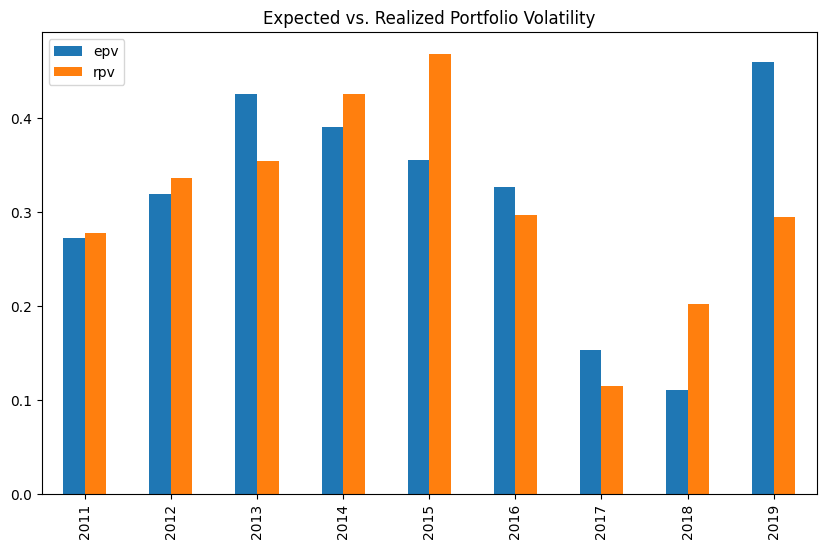

In [53]:
res[['epv', 'rpv']].plot(kind='bar', figsize=(10, 6), title='Expected vs. Realized Portfolio Volatility')

The conclusions are the opposite when comparing the expected with the realized porfolio returns.

In [54]:
res[['epr', 'rpr']].corr()

,epr,rpr
epr,1.000000,-0.597791
rpr,-0.597791,1.000000


<Axes: title={'center': 'Expected vs. Realized Portfolio Return'}>

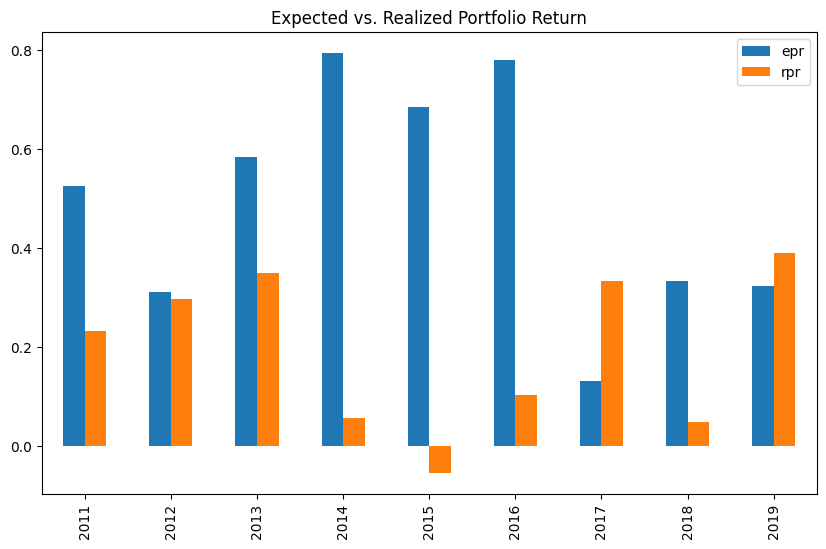

In [55]:
res[['epr', 'rpr']].plot(kind='bar', figsize=(10, 6), title='Expected vs. Realized Portfolio Return')

In [56]:
# expected vs. realized Sharpe ratio
res[['esr', 'rsr']].corr()

,esr,rsr
esr,1.000000,-0.698419
rsr,-0.698419,1.000000


<Axes: title={'center': 'Expected vs. Realized Sharpe Ratio'}>

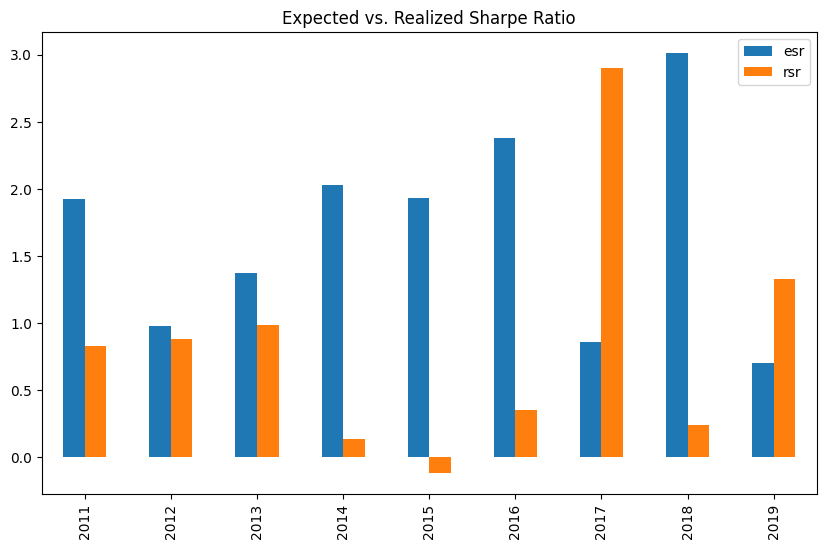

In [57]:
res[['esr', 'rsr']].plot(kind='bar', figsize=(10, 6), title='Expected vs. Realized Sharpe Ratio')

## Capital Asset Pricing Model

The following Python code first derives the beta for every stock for a given year, and then calculates the expected return for the stock in the next year, given its beta and the performance of the market portfolio.

In [58]:
# specifies the risk-less short rate
r = 0.005

In [59]:
# defines the market porfolio
market = '.SPX'

In [60]:
rets = np.log(raw / raw.shift(1)).dropna()

In [61]:
res = pd.DataFrame()

In [63]:
for sym in rets.columns[:4]:
    print('\n' + sym)
    print(54 * '=')
    for year in range(2010, 2019):
        rets_ = rets.loc[f'{year}-01-01':f'{year}-12-31']
        muM = rets_[market].mean() * 252

        # derives the beta of the stock
        cov = rets_.cov().loc[sym, market]
        var = rets_[market].var()
        beta = cov / var

        rets_ = rets.loc[f'{year + 1}-01-01':f'{year + 1}-12-31']
        muM = rets_[market].mean() * 252
        # calculates the expected return given previous year's beta and current year market portfolio performance
        mu_capm = r + beta * (muM - r)
        # calculates the realized performance of the stock for the current year
        mu_real = rets_[sym].mean() * 252
        # collects and prints all results
        res = pd.concat([res, pd.DataFrame(
            {'symbol': sym,
             'mu_capm': mu_capm,
             'mu_real': mu_real}, index=[year + 1]
        )], sort=True)
        # res = res.append(pd.DataFrame(
        #     {'symbol': sym,
        #      'mu_capm': mu_capm,
        #      'mu_real': mu_real}, index=[year + 1]
        # ), sort=True)
        print('{} | beta: {:.3f} | mu_capm: {:6.3f} | mu_real : {:6.3f}'.format(year + 1, beta, mu_capm, mu_real))


AAPL.O
2011 | beta: 1.052 | mu_capm: -0.000 | mu_real :  0.228
2012 | beta: 0.764 | mu_capm:  0.098 | mu_real :  0.275
2013 | beta: 1.266 | mu_capm:  0.327 | mu_real :  0.053
2014 | beta: 0.630 | mu_capm:  0.070 | mu_real :  0.320
2015 | beta: 0.833 | mu_capm: -0.005 | mu_real : -0.047
2016 | beta: 1.144 | mu_capm:  0.103 | mu_real :  0.096
2017 | beta: 1.009 | mu_capm:  0.180 | mu_real :  0.381
2018 | beta: 1.379 | mu_capm: -0.091 | mu_real : -0.071
2019 | beta: 1.252 | mu_capm:  0.316 | mu_real :  0.621

MSFT.O
2011 | beta: 0.890 | mu_capm:  0.001 | mu_real : -0.072
2012 | beta: 0.816 | mu_capm:  0.104 | mu_real :  0.029
2013 | beta: 1.109 | mu_capm:  0.287 | mu_real :  0.337
2014 | beta: 0.876 | mu_capm:  0.095 | mu_real :  0.216
2015 | beta: 0.955 | mu_capm: -0.007 | mu_real :  0.178
2016 | beta: 1.249 | mu_capm:  0.113 | mu_real :  0.113
2017 | beta: 1.224 | mu_capm:  0.217 | mu_real :  0.321
2018 | beta: 1.303 | mu_capm: -0.086 | mu_real :  0.172
2019 | beta: 1.442 | mu_capm:  0

In [84]:
res[res['symbol'] == sym].iloc[:, :2]

,mu_capm,mu_real
2011,-0.000544,-0.039087
2012,0.121667,0.374034
2013,0.288693,0.463500
2014,0.134834,-0.250734
2015,-0.013112,0.778330
2016,0.101577,0.103870
2017,0.198660,0.446177
2018,-0.085527,0.251224
2019,0.407763,0.207240


In [86]:
# single stock comparison

sym = 'AMZN.O'

res[res['symbol'] == sym].iloc[:, :2].corr()

,mu_capm,mu_real
mu_capm,1.000000,-0.004826
mu_real,-0.004826,1.000000


<Axes: title={'center': 'AMZN.O'}>

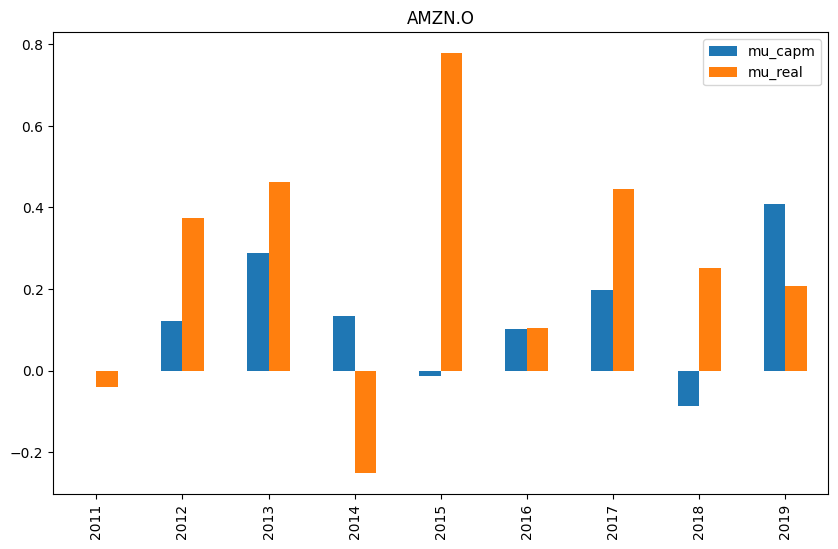

In [87]:
res[res['symbol'] == sym].plot(kind='bar', figsize=(10, 6), title=sym)

The CAPM predictions do not vary much on average for the stock analyzed between 12.2% and 14.4%. However, the realized average returns of the stocks show a high variability between 9.4% and 29.2%.

Market porffolio performance and beta alone obviously cannot account for the observed returns of the stocks

In [88]:
grouped = res.groupby('symbol').mean()
grouped

,mu_capm,mu_real
symbol,,
AAPL.O,0.110855,0.206158
AMZN.O,0.128223,0.259395
INTC.O,0.117929,0.116180
MSFT.O,0.120844,0.192655


<Axes: title={'center': 'Average Values'}, xlabel='symbol'>

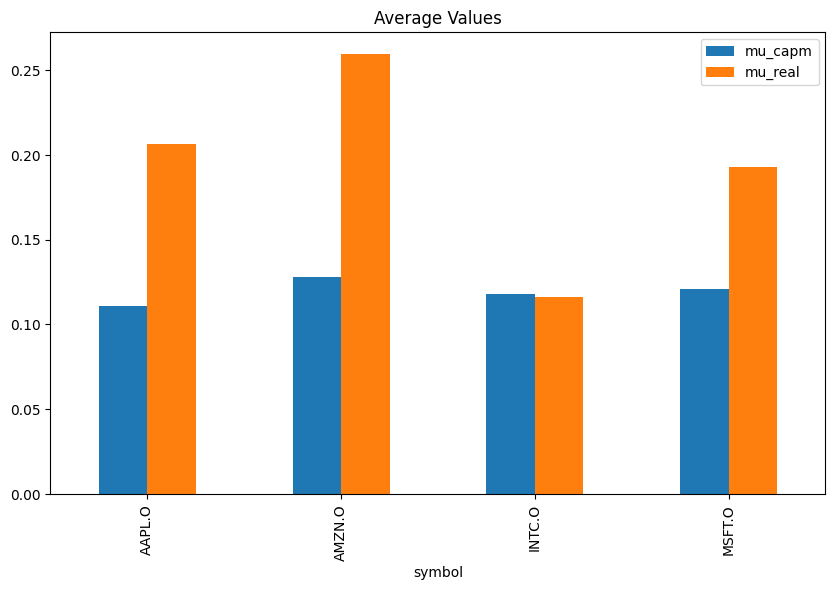

In [89]:
grouped.plot(kind='bar', figsize=(10, 6), title='Average Values')

## Arbitrage Pricing Theory

A valid question is whether the market porfolio performance alone is enough to explain variability in stock returns. The answer of the APT is no - ther`e` can be more factors that together explain variability in stock returns.

- Market volatility (as represented by the VIX)

- Exchange rates (as represented by the EUR/USD rate, EUR=)

- Commodity prices (as represented by the gold price, XAU=)

In [90]:
factors = ['.SPX', '.VIX', 'EUR=', 'XAU=']

In [91]:
res = pd.DataFrame()

In [92]:
np.set_printoptions(formatter={
    'float': lambda x: f'{x:5.2f}'
})

In [94]:
for sym in rets.columns[:4]:
    print('\n' + sym)
    print(71 * '=')
    for year in range(2010, 2019):
        rets_ = rets.loc[f'{year}-01-01': f'{year}-12-31']
        # the multivariate regression
        reg = np.linalg.lstsq(rets_[factors], rets_[sym], rcond=-1)[0]
        rets_ = rets.loc[f'{year + 1}-01-01': f'{year + 1}-12-31']
        # the APT-predicted return of the stock
        mu_apt = np.dot(rets_[factors].mean() * 252, reg)
        # the realized return of the stock
        mu_real = rets_[sym].mean() * 252

        res = pd.concat([res, pd.DataFrame({
            'symbol': sym,
            'mu_apt': mu_apt,
            'mu_real': mu_real
        }, index=[year + 1])])
        
        # res = res.append(pd.DataFrame({
        #     'symbol': sym,
        #     'mu_apt': mu_apt,
        #     'mu_real': mu_real
        # }, index=[year + 1]))

        print('{} | f1: {} | mu_apt: {:6.3f} | mu_real: {:6.3f}'.format(year + 1, reg.round(2), mu_apt, mu_real))


AAPL.O
2011 | f1: [ 0.91 -0.04 -0.35  0.12] | mu_apt:  0.011 | mu_real:  0.228
2012 | f1: [ 0.76 -0.02 -0.24  0.05] | mu_apt:  0.099 | mu_real:  0.275
2013 | f1: [ 1.67  0.04 -0.56  0.10] | mu_apt:  0.366 | mu_real:  0.053
2014 | f1: [ 0.53 -0.00  0.02  0.16] | mu_apt:  0.050 | mu_real:  0.320
2015 | f1: [ 1.07  0.02  0.25  0.01] | mu_apt: -0.038 | mu_real: -0.047
2016 | f1: [ 1.21  0.01 -0.14 -0.02] | mu_apt:  0.110 | mu_real:  0.096
2017 | f1: [ 1.10  0.01 -0.15 -0.02] | mu_apt:  0.170 | mu_real:  0.381
2018 | f1: [ 1.06 -0.03 -0.15  0.12] | mu_apt: -0.088 | mu_real: -0.071
2019 | f1: [ 1.37  0.01 -0.20  0.13] | mu_apt:  0.364 | mu_real:  0.621

MSFT.O
2011 | f1: [ 0.98  0.01  0.02 -0.11] | mu_apt: -0.008 | mu_real: -0.072
2012 | f1: [ 0.82  0.00 -0.03 -0.01] | mu_apt:  0.103 | mu_real:  0.029
2013 | f1: [ 1.14  0.00 -0.07 -0.01] | mu_apt:  0.294 | mu_real:  0.337
2014 | f1: [ 1.28  0.05  0.04  0.07] | mu_apt:  0.149 | mu_real:  0.216
2015 | f1: [ 1.20  0.03  0.05  0.01] | mu_apt: -

In [95]:
sym = 'AMZN.O'

In [100]:
res[res['symbol'] == sym].iloc[:, 1:].corr()

,mu_apt,mu_real
mu_apt,1.000000,-0.098281
mu_real,-0.098281,1.000000


<Axes: title={'center': 'AMZN.O'}>

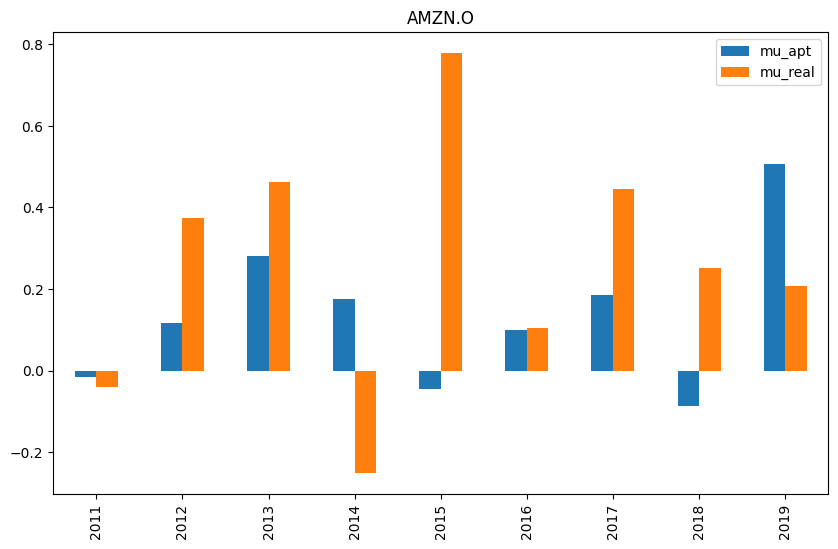

In [101]:
res[res['symbol'] == sym].plot(kind='bar', figsize=(10, 6), title=sym)

In [102]:
grouped = res.groupby('symbol').mean()
grouped

,mu_apt,mu_real
symbol,,
AAPL.O,0.116116,0.206158
AMZN.O,0.135528,0.259395
INTC.O,0.124811,0.116180
MSFT.O,0.128441,0.192655


<Axes: title={'center': 'Average Values'}, xlabel='symbol'>

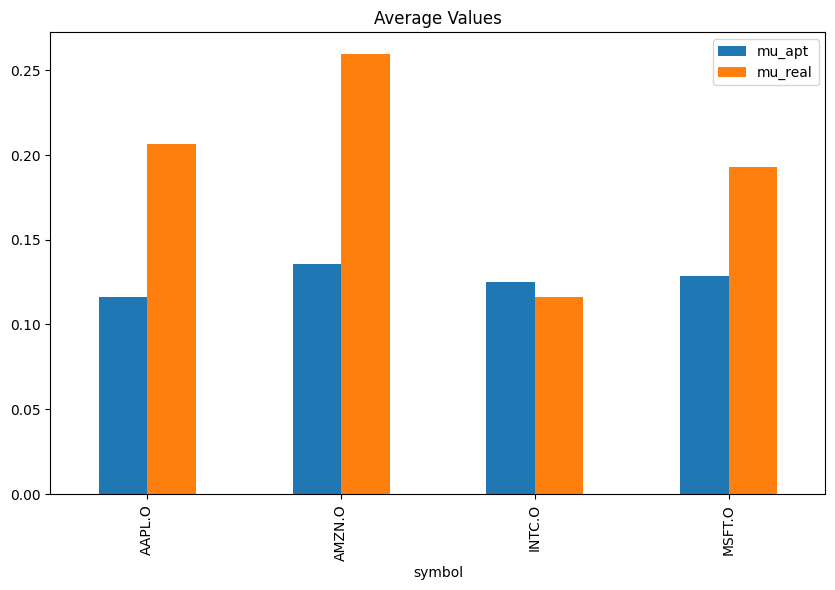

In [103]:
grouped.plot(kind='bar', figsize=(10, 6), title='Average Values')

The data-driven investor decied to find out what risk factors are typically considered relevant ones for stocks.

| Factor | Description | RIC |
| ---- | ---- | ---- |
| Market | MSCI Workd Gross <br> Return Daily USD <br> (PUS = Price Return | `.dMIW000000GUS` |
| Size | MSCI World Equal <br> Weight Price Net <br> Index EOD | `.dMiW00000ENUS` |
| Volatility | MSCI World Minimum <br> Volatility Net <br> Return | `.dMiW00000YNUS`|
| Value | MSCI World Value <br> Weighted Gross <br> (NUS for Net) | `dMIW0000PkGUS` |
| Risk | MSCI World Risk <br> Weighted Gross USD <br> EOD | `dMIW0000P1GUS` |
| Growth | MSCI World Quality <br>Net Return USD | `.MIW00000vNUS`|
| Momentum | MSCI World Momentum <br> Gross Index USD <br> EOD | `.dMIW00000NGUS` |

In [104]:
# retrieve factors time series data
factors = pd.read_csv('http://hilpisch.com/aiif_eikon_eod_factors.csv', index_col=0, parse_dates=True)

/Users/woojin/anaconda3/envs/pytorch/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/woojin/anaconda3/envs/pytorch/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/woojin/anaconda3/envs/pytorch/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/woojin/anaconda3/envs/pytorch/lib/python3.9/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a Dat

<Axes: xlabel='Date'>

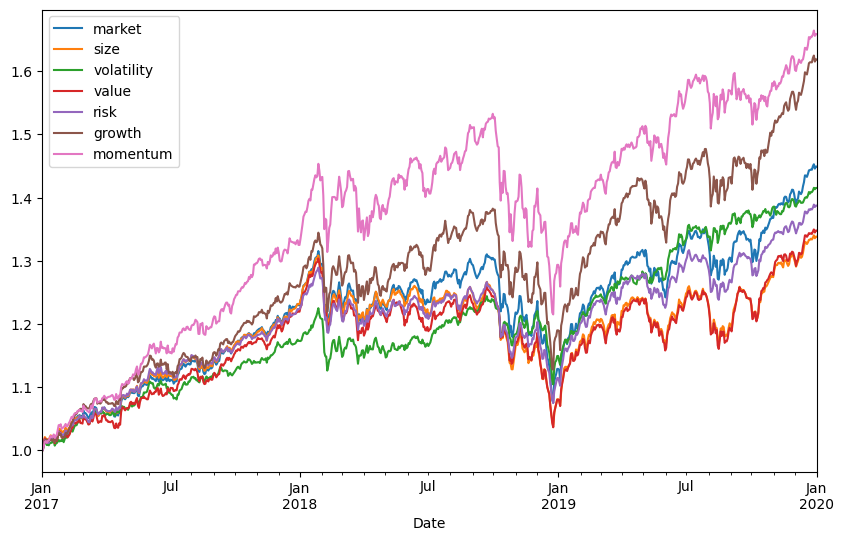

In [105]:
# normalizes and plots the data
(factors / factors.iloc[0]).plot(figsize = (10, 6))

In [106]:
start = '2017-01-01'
end = '2020-01-01'

In [107]:
retsd = rets.loc[start:end].copy()
retsd.dropna(inplace=True)

In [108]:
# calculates an processes the log returns for the factors
retsf = np.log(factors / factors.shift(1))
retsf = retsf.loc[start:end]
retsf.dropna(inplace=True)
retsf = retsf.loc[retsd.index].dropna()

In [109]:
retsf.corr()

,market,size,volatility,value,risk,growth,momentum
market,1.000000,0.935867,0.845010,0.964124,0.947150,0.959038,0.928705
size,0.935867,1.000000,0.791767,0.965739,0.983238,0.835477,0.796420
volatility,0.845010,0.791767,1.000000,0.778294,0.865467,0.818280,0.819585
value,0.964124,0.965739,0.778294,1.000000,0.958359,0.864222,0.818796
risk,0.947150,0.983238,0.865467,0.958359,1.000000,0.858546,0.825563
growth,0.959038,0.835477,0.818280,0.864222,0.858546,1.000000,0.952956
momentum,0.928705,0.796420,0.819585,0.818796,0.825563,0.952956,1.000000


The following Python code derives facgtor loadings for the original stocks but with the new factors. They are derived from the first half of the data set and applied to predict the stock return for the second half given the performance of the single factors.

In [110]:
res = pd.DataFrame()

In [111]:
np.set_printoptions(formatter={'float': lambda x: f'{x:5.2f}'})

In [113]:
split = int(len(retsf) * 0.5)

for sym in rets.columns[:4]:
    print('\n' + sym)
    print(74 * '=')
    retsf_, retsd_ = retsf.iloc[:split], retsd.iloc[:split]

    reg = np.linalg.lstsq(retsf_, retsd_[sym], rcond=-1)[0]

    retsf_, retsd_ = retsf.iloc[split:], retsd.iloc[split:]
    mu_apt = np.dot(retsf_.mean() * 252, reg)
    mu_real = retsd_[sym].mean() * 252

    res = pd.concat([res, pd.DataFrame({
        'mu_apt': mu_apt,
        'mu_real': mu_real
    }, index=[sym,])], sort=True)

    print('f1: {} | apt: {:.3f} | real: {:.3f}'.format(reg.round(1), mu_apt, mu_real))


AAPL.O
f1: [ 2.30  2.80 -0.70 -1.40 -4.20  2.00 -0.20] | apt: 0.115 | real: 0.301

MSFT.O
f1: [ 1.50  0.00  0.10 -1.30 -1.40  0.80  1.00] | apt: 0.181 | real: 0.304

INTC.O
f1: [-3.10  1.60  0.40  1.30 -2.60  2.50  1.10] | apt: 0.186 | real: 0.118

AMZN.O
f1: [ 9.10  3.30 -1.00 -7.10 -3.10 -1.80  1.20] | apt: 0.019 | real: 0.050


<Axes: >

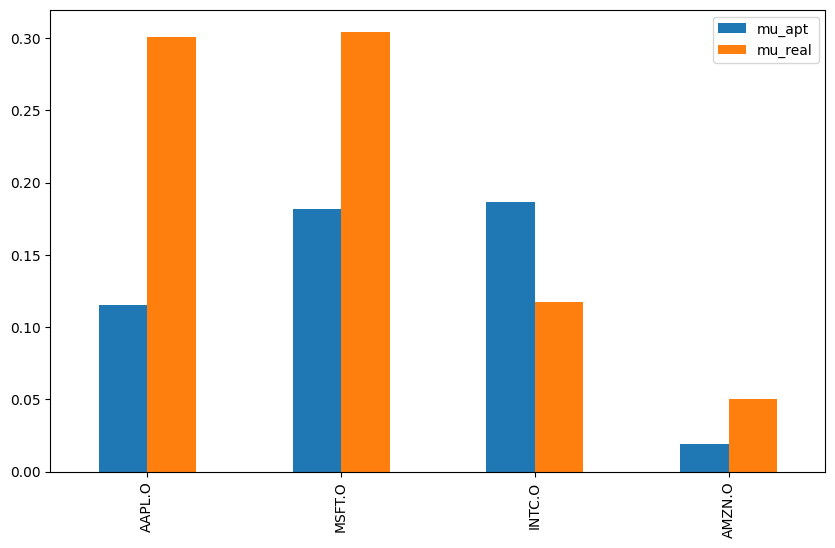

In [114]:
res.plot(kind='bar', figsize=(10, 6))

The factor loadings are used to test whether APT can explain movement of the stock price over time. Although APT does not predict the absolute performance correctly, it predicts the direction of the stock price movement correctrly in the majority of cases.

In [115]:
sym

'AMZN.O'

In [116]:
# predicts the daily stock price returns given the realized factor returns
rets_sym = np.dot(retsf_, reg)

In [117]:
# stores the results in a DataFrame object and adds column and index data
rets_sym = pd.DataFrame(rets_sym, columns=[sym + '_apt'], index=retsf_.index)

In [118]:
# adds the realized stock price returns to the DataFrame object
rets_sym[sym + '_real'] = retsd_[sym]

In [119]:
# calculates the annualized returns
rets_sym.mean() * 252

AMZN.O_apt     0.019401
AMZN.O_real    0.050344
dtype: float64

In [120]:
# calculates the annualized volatility
rets_sym.std() * 252 ** 0.5

AMZN.O_apt     0.270995
AMZN.O_real    0.307653
dtype: float64

In [121]:
# calculates the correlation factor
rets_sym.corr()

,AMZN.O_apt,AMZN.O_real
AMZN.O_apt,1.000000,0.832218
AMZN.O_real,0.832218,1.000000


<Axes: xlabel='Date'>

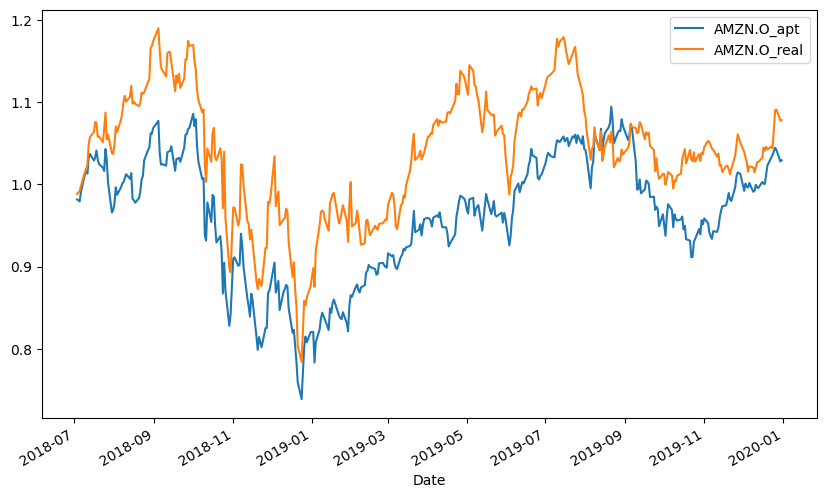

In [122]:
rets_sym.cumsum().apply(np.exp).plot(figsize=(10, 6))

How accurately does APT predict the direction of the stock price movement given the realized factor returns? The following code shows that the accuracy score is a bit better than 75%.

In [123]:
rets_sym['same'] = (np.sign(rets_sym[sym + '_apt']) == np.sign(rets_sym[sym + '_real']))

In [124]:
rets_sym['same'].value_counts()

same
True     288
False     89
Name: count, dtype: int64

In [125]:
rets_sym['same'].value_counts()[True] / len(rets_sym)

0.7639257294429708

# Debunking Central Assumptions

## Normally Distributed Returns

### Sample data sets

In [126]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
np.random.seed(100)

In [127]:
N = 10000

In [128]:
# normal ditributsion
# draws standard normally distributed random numbers
snrn = np.random.standard_normal(N)

# corrects the first movement (expectation) to 0.0
snrn -= snrn.mean()

# corrects the second movement (standard deviation) to 1.0
snrn /= snrn.std()

In [129]:
round(snrn.mean(), 4)

-0.0

In [130]:
round(snrn.std(), 4)

1.0

(array([ 2.00, 12.00, 20.00, 41.00, 34.00, 94.00, 133.00, 167.00, 225.00,
        324.00, 437.00, 502.00, 646.00, 726.00, 737.00, 790.00, 799.00,
        764.00, 694.00, 666.00, 573.00, 446.00, 360.00, 274.00, 189.00,
        135.00, 74.00, 44.00, 38.00, 27.00, 10.00,  8.00,  3.00,  3.00,
         3.00]),
 array([-3.28, -3.08, -2.87, -2.67, -2.47, -2.26, -2.06, -1.86, -1.65,
        -1.45, -1.25, -1.04, -0.84, -0.64, -0.44, -0.23, -0.03,  0.17,
         0.38,  0.58,  0.78,  0.99,  1.19,  1.39,  1.60,  1.80,  2.00,
         2.21,  2.41,  2.61,  2.82,  3.02,  3.22,  3.43,  3.63,  3.83]),
 <BarContainer object of 35 artists>)

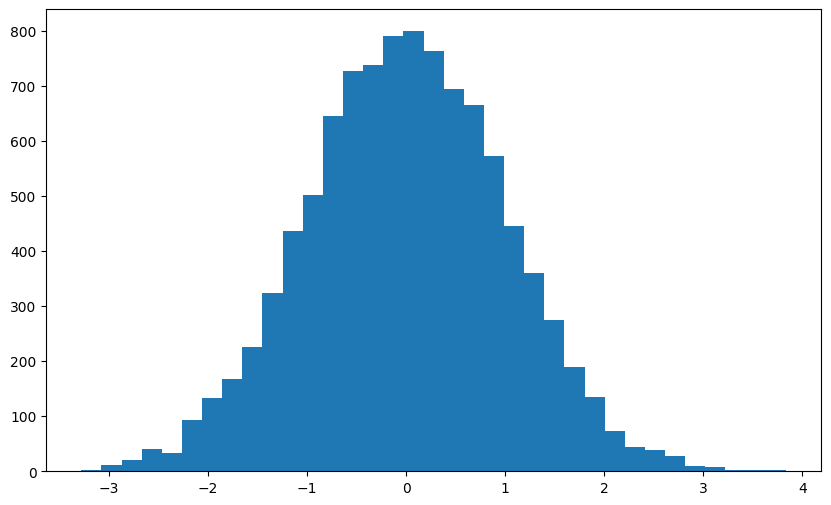

In [131]:
plt.figure(figsize=(10, 6))
plt.hist(snrn, bins=35)

In [132]:
# the distribition with three discrete values

numbers = np.ones(N) * 1.5
split = int(0.25 * N)
numbers[split:3 * split] = -1
numbers[3 * split: 4 * split] = 0

In [133]:
numbers -= numbers.mean()
numbers /= numbers.std()

In [134]:
round(numbers.mean(), 4)

0.0

In [135]:
round(numbers.std(), 4)

1.0

(array([5000.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,
         0.00,  0.00,  0.00,  0.00,  0.00, 2500.00,  0.00,  0.00,  0.00,
         0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,
         0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00, 2500.00]),
 array([-0.86, -0.79, -0.72, -0.65, -0.58, -0.51, -0.44, -0.37, -0.30,
        -0.23, -0.16, -0.09, -0.02,  0.05,  0.12,  0.19,  0.26,  0.33,
         0.40,  0.47,  0.54,  0.61,  0.68,  0.75,  0.82,  0.89,  0.96,
         1.03,  1.10,  1.17,  1.24,  1.31,  1.38,  1.45,  1.52,  1.59]),
 <BarContainer object of 35 artists>)

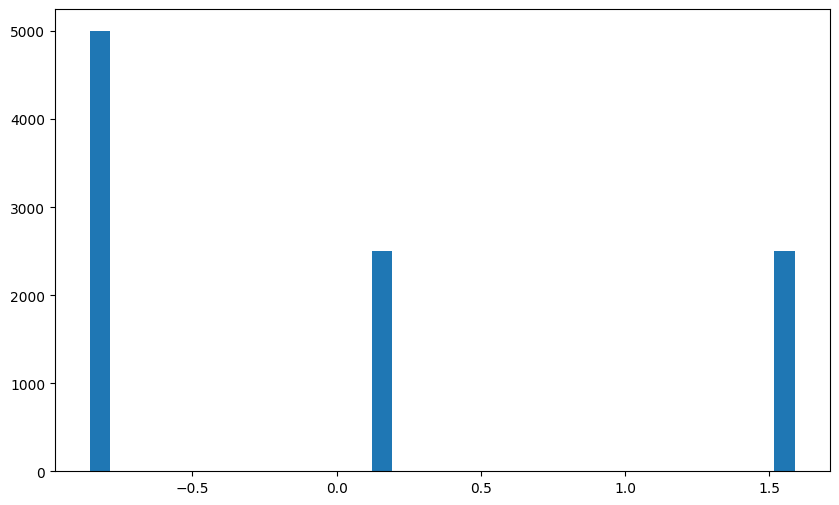

In [136]:
plt.figure(figsize=(10, 6))
plt.hist(numbers, bins=35)

Consider the following Python functions that allow one to visualize data as a histogram and to add a probability density function (PDF) of a normal distribution with the first two moments of the data

In [137]:
import math
import scipy.stats as scs
import statsmodels.api as sm

In [138]:
def dN(x, mu, sigma):
    ''' Probability density function of a normal random variable x.
    '''
    z = (x - mu) / sigma
    pdf = np.exp(-0.5 * z ** 2) / math.sqrt(2 * math.pi * sigma ** 2)
    return pdf

In [139]:
def return_histogram(rets, title=''):
    ''' plots a histrogram of the returns
    '''
    plt.figure(figsize=(10, 6))
    x = np.linspace(min(rets), max(rets), 100)
    plt.hist(np.array(rets), bins=50, density=True, label='frequency')
    y = dN(x, np.mean(rets), np.std(rets))
    plt.plot(x, y, linewidth=2, label='PDF')
    plt.xlabel('log returns')
    plt.ylabel('frequency/probability')
    plt.title(title)
    plt.legend()

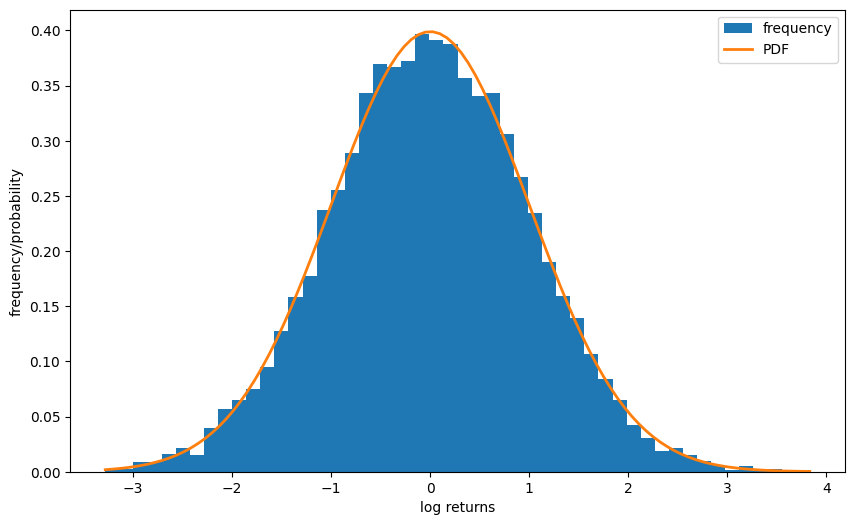

In [140]:
return_histogram(snrn)

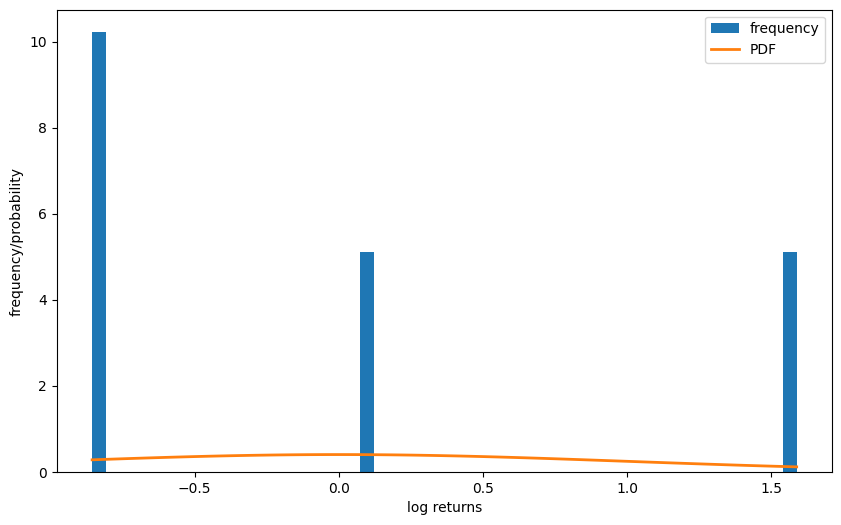

In [141]:
return_histogram(numbers)

In [142]:
# qq-plot

def return_qqplot(rets, title=''):
    ''' generates a Q-Q plot of the returns
    '''
    fig = sm.qqplot(rets, line='s', alpha=0.5)
    fig.set_size_inches(10, 6)
    plt.title(title)
    plt.xlabel('theoretical quantiles')
    plt.ylabel('sample quantile')

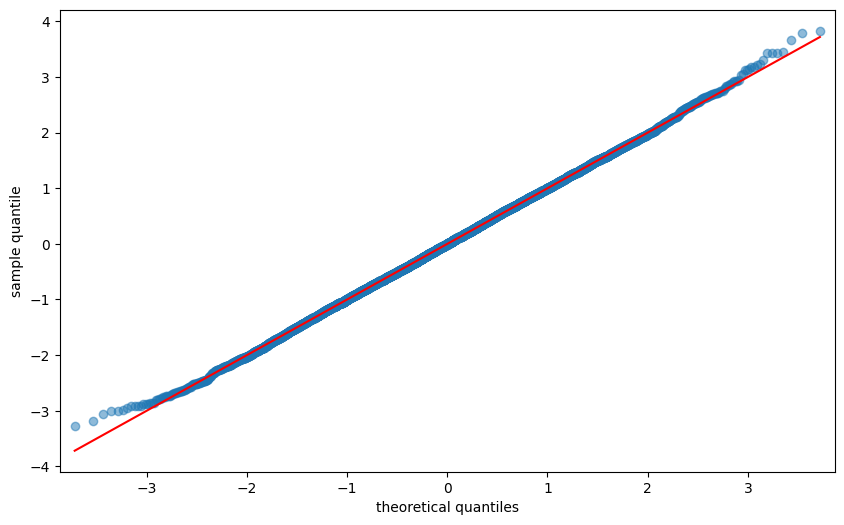

In [143]:
return_qqplot(snrn)

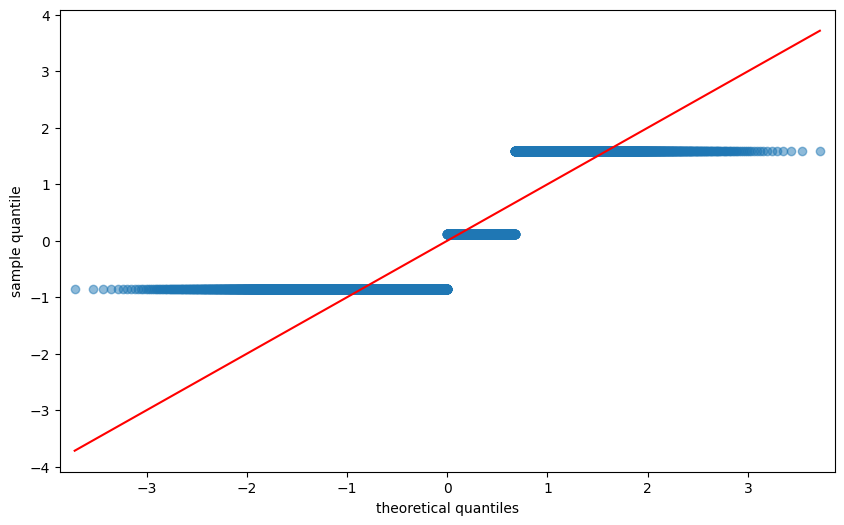

In [144]:
return_qqplot(numbers)

In [145]:
# statistical test : skew and kertosis
# p-value below 0.5 is generally considered to be a counter-indicator for normality.

def print_statistics(rets):
    print('RETURN SAMPLE STATISTICS')
    print('--------------------------------------------')
    print('Skew of Sample Log Returns {:9.6f}'.format(scs.skew(rets)))
    print('Skew Normal Test p-value {:9.6f}'.format(scs.skewtest(rets)[1]))
    print('--------------------------------------------')
    print('Kurt of Sample Log Returns {:9.6f}'.format(scs.kurtosis(rets)))
    print('Kurt Normal Test p-value {:9.6f}'.format(scs.kurtosistest(rets)[1]))
    print('--------------------------------------------')
    print('Normal Test p-value {:9.6f}'.format(scs.normaltest(rets)[1]))
    print('--------------------------------------------')

In [146]:
print_statistics(snrn)

RETURN SAMPLE STATISTICS
--------------------------------------------
Skew of Sample Log Returns  0.016793
Skew Normal Test p-value  0.492685
--------------------------------------------
Kurt of Sample Log Returns -0.024540
Kurt Normal Test p-value  0.637637
--------------------------------------------
Normal Test p-value  0.707334
--------------------------------------------


In [147]:
print_statistics(numbers)

RETURN SAMPLE STATISTICS
--------------------------------------------
Skew of Sample Log Returns  0.689254
Skew Normal Test p-value  0.000000
--------------------------------------------
Kurt of Sample Log Returns -1.141902
Kurt Normal Test p-value  0.000000
--------------------------------------------
Normal Test p-value  0.000000
--------------------------------------------


### Real financial returns

Log returns of the S&P 500 stock index represented as a histogram show a much higher peak and fatter tails compared to the normal PDF - stylized facts.

In [148]:
raw = pd.read_csv('http://hilpisch.com/aiif_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()

In [149]:
rets = np.log(raw / raw.shift(1)).dropna()

In [150]:
symbol = '.SPX'

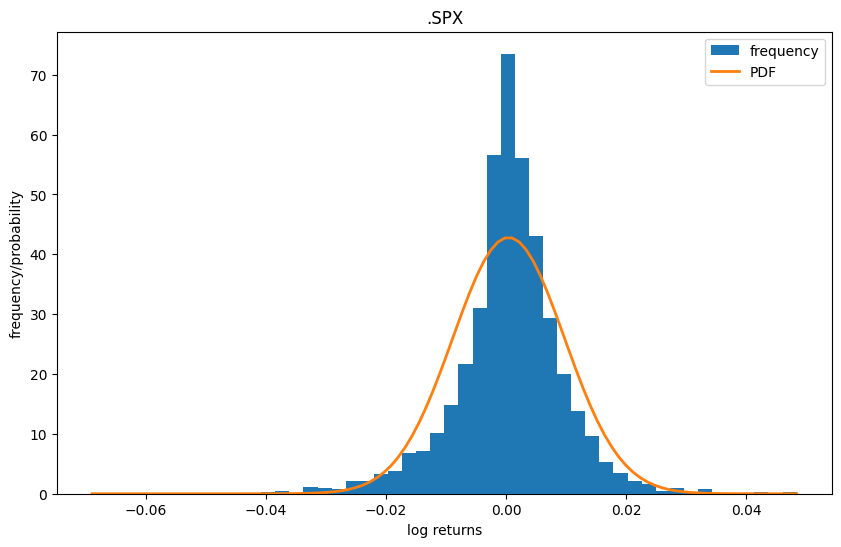

In [151]:
return_histogram(rets[symbol].values, symbol)

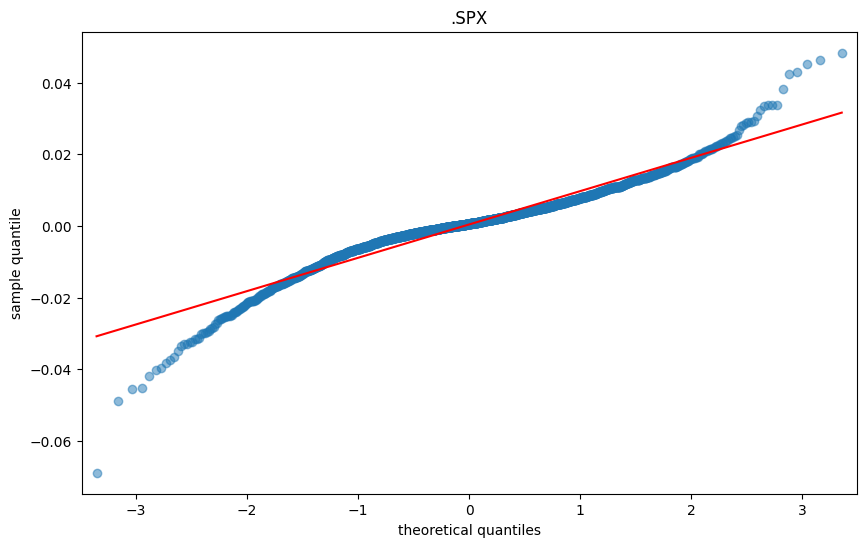

In [152]:
return_qqplot(rets[symbol].values, symbol)

In [153]:
symbols = ['.SPX', 'AMZN.O', 'EUR=', 'GLD']

In [154]:
for sym in symbols:
    print('\n{}'.format(sym))
    print(45 * '=')

    print_statistics(rets[sym].values)


.SPX
RETURN SAMPLE STATISTICS
--------------------------------------------
Skew of Sample Log Returns -0.497160
Skew Normal Test p-value  0.000000
--------------------------------------------
Kurt of Sample Log Returns  4.598167
Kurt Normal Test p-value  0.000000
--------------------------------------------
Normal Test p-value  0.000000
--------------------------------------------

AMZN.O
RETURN SAMPLE STATISTICS
--------------------------------------------
Skew of Sample Log Returns  0.135268
Skew Normal Test p-value  0.005689
--------------------------------------------
Kurt of Sample Log Returns  7.344837
Kurt Normal Test p-value  0.000000
--------------------------------------------
Normal Test p-value  0.000000
--------------------------------------------

EUR=
RETURN SAMPLE STATISTICS
--------------------------------------------
Skew of Sample Log Returns -0.053959
Skew Normal Test p-value  0.268203
--------------------------------------------
Kurt of Sample Log Returns  1.78089

## Linear Relationships

The assumed linear relationship in CAPM between the beta of a stock and its expected (realized) return. The higher the beta is, the higher the expected return given a positive market performance will be.

The beta values are added to the result's `DataFrame` object as well.

In [155]:
r = 0.005

In [156]:
market = '.SPX'

In [157]:
res = pd.DataFrame()

In [159]:
for sym in rets.columns[:4]:
    for year in range(2010, 2019):
        rets_ = rets.loc[f'{year}-01-01':f'{year}-12-31']
        muM = rets_[market].mean() * 252
        cov = rets_.cov().loc[sym, market]
        var = rets_[market].var()
        beta = cov / var
        rets_ = rets.loc[f'{year+1}-01-01':f'{year+1}-12-31']
        numM = rets_[market].mean() * 252
        mu_capm = r + beta * (muM - r)
        mu_real = rets_[sym].mean() * 252
        res = pd.concat([res, pd.DataFrame({
            'symbol': sym,
            'beta': beta,
            'mu_capm': mu_capm,
            'mu_real': mu_real
        }, index=[year + 1])], sort=True)

$R^2$ refers to the coefficient of determination and measures how well a model performs compared to a baseline predictor in the form of a simple mean value. The linear regression can only explain around 10% of the variability in the expected CAPM return.

In [160]:
from sklearn.metrics import r2_score

In [161]:
reg = np.polyfit(res['beta'], res['mu_capm'], deg=1)

In [162]:
res['mu_capm_ols'] = np.polyval(reg, res['beta'])

In [163]:
r2_score(res['mu_capm'], res['mu_capm_ols'])

0.009325824262325755

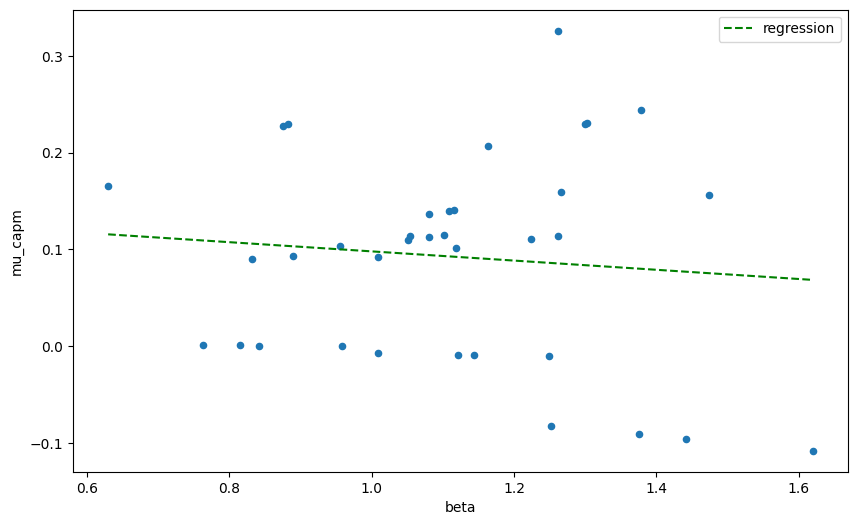

In [164]:
res.plot(kind='scatter', x='beta', y='mu_capm', figsize=(10, 6))
x = np.linspace(res['beta'].min(), res['beta'].max())

plt.plot(x, np.polyval(reg, x), 'g--', label='regression')
plt.legend()